# DALL·E mini - Inference pipeline

*Generate images from a text prompt*

<img src="https://github.com/borisdayma/dalle-mini/blob/main/img/logo.png?raw=true" width="200">

This notebook illustrates [DALL·E mini](https://github.com/borisdayma/dalle-mini) inference pipeline.

Just want to play? Use [the demo](https://huggingface.co/spaces/flax-community/dalle-mini) (temporarily in beta on Huging Face Spaces but soon to be open to all).

For more understanding of the model, refer to [the report](https://wandb.ai/dalle-mini/dalle-mini/reports/DALL-E-mini--Vmlldzo4NjIxODA).

## Install dependencies

In [1]:
!pip install -q transformers flax
!pip install -q git+https://github.com/patil-suraj/vqgan-jax.git  # VQGAN model in JAX
!pip install -q git+https://github.com/borisdayma/dalle-mini.git  # Model files

     |████████████████████████████████| 2.9 MB 5.2 MB/s 
     |████████████████████████████████| 193 kB 35.5 MB/s 
     |████████████████████████████████| 895 kB 42.8 MB/s 
     |████████████████████████████████| 3.3 MB 35.8 MB/s 
     |████████████████████████████████| 56 kB 4.8 MB/s 
     |████████████████████████████████| 596 kB 49.6 MB/s 
     |████████████████████████████████| 118 kB 47.2 MB/s 
     |████████████████████████████████| 57 kB 5.2 MB/s 


## Generate encoded images

We generate prediction samples from a text prompt using `flax-community/dalle-mini` model.

In [2]:
from dalle_mini.model import CustomFlaxBartForConditionalGeneration
from transformers import BartTokenizer
import jax
import random
from tqdm.notebook import tqdm, trange

In [3]:
# make sure we use compatible versions
DALLE_REPO = 'flax-community/dalle-mini'
DALLE_COMMIT_ID = '4d34126d0df8bc4a692ae933e3b902a1fa8b6114'

In [4]:
# set up tokenizer and model
tokenizer = BartTokenizer.from_pretrained(DALLE_REPO, revision=DALLE_COMMIT_ID)
model = CustomFlaxBartForConditionalGeneration.from_pretrained(DALLE_REPO, revision=DALLE_COMMIT_ID)

Downloading:   0%|          | 0.00/780k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/343 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.66k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.64G [00:00<?, ?B/s]

INFO:absl:Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 
INFO:absl:Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.


In [59]:
# set a prompt
prompt = 'tttfdds daaa ffggff safyvss csdjsxihdisslsdj skhkxzhakldkm skhsl dg df  ambjh'

In [60]:
# tokenize the prompt
tokenized_prompt = tokenizer(prompt, return_tensors='jax', padding='max_length', truncation=True, max_length=128)
tokenized_prompt

{'input_ids': DeviceArray([[    0,  5967, 41407, 47286,   385, 44631, 48400,  6149,
               3145, 25277,   219,   705,  7485,   740, 28045, 21978,
               1178,  4001,   417,  3006,  6634, 26029,  2972,   298,
                330,  1178, 13808,   677,  4779,  7203,  2972,   298,
               9996,   385,   571, 47942,  1437, 13569,   267,   298,
                  2,     1,     1,     1,     1,     1,     1,     1,
                  1,     1,     1,     1,     1,     1,     1,     1,
                  1,     1,     1,     1,     1,     1,     1,     1,
                  1,     1,     1,     1,     1,     1,     1,     1,
                  1,     1,     1,     1,     1,     1,     1,     1,
                  1,     1,     1,     1,     1,     1,     1,     1,
                  1,     1,     1,     1,     1,     1,     1,     1,
                  1,     1,     1,     1,     1,     1,     1,     1,
                  1,     1,     1,     1,     1,     1,     1,     1,
      

Notes:

* `0`: BOS, special token representing the beginning of a sequence
* `2`: EOS, special token representing the end of a sequence
* `1`: special token representing the padding of a sequence when requesting a specific length

In [61]:
n_predictions = 8

# create random keys
seed = random.randint(0, 2**32-1)
key = jax.random.PRNGKey(seed)
subkeys = jax.random.split(key, num=n_predictions)
subkeys

DeviceArray([[1171342022, 1941782580],
             [3243166764, 3424083636],
             [1093593409, 1797779259],
             [ 394183679,  536709325],
             [ 472240165, 2920093691],
             [3930692638, 1111329010],
             [3312637770, 3177798780],
             [ 761442345, 3338930731]], dtype=uint32)

In [62]:
# generate sample predictions
encoded_images = [model.generate(**tokenized_prompt, do_sample=True, num_beams=1, prng_key=subkey) for subkey in tqdm(subkeys)]
encoded_images[0]

  0%|          | 0/8 [00:00<?, ?it/s]

FlaxSampleOutput([('sequences',
                   DeviceArray([[16384,  9470, 11718, 13670, 14447,  6172,  7504, 11456,
                                  7504, 13670, 11718, 10549,   321,  4635, 10019, 15149,
                                  7191, 13909,   601, 14703,   601, 16223, 13427,  7504,
                                 11456, 14447, 16223, 14164, 10813,  8888,  6965, 13010,
                                 15528,  1304,  8447, 14447,  6172, 12145, 12183, 12215,
                                  3812,  7504,  6598,  6805,  1597,  3927,  6965,  6690,
                                  4090, 11718, 14447,  2428, 11993, 10508,  8328,  2572,
                                 14839,  2129, 12786,  8322,  5213,  6113, 15729,  8413,
                                 12627,  4815, 10019, 10019,  5305, 15282,  9713, 11708,
                                 16223,  1183, 11348,  4099,    23, 15916, 11718,  8413,
                                 15523, 10227, 16223,  4099,  4868,  9720,  27

The first token (`16384`) is a special token representing the start of a sequence in the decoder (not part of the image codebook).

In [63]:
# remove first token (BOS)
encoded_images = [img.sequences[..., 1:] for img in encoded_images]
encoded_images[0]

DeviceArray([[ 9470, 11718, 13670, 14447,  6172,  7504, 11456,  7504,
              13670, 11718, 10549,   321,  4635, 10019, 15149,  7191,
              13909,   601, 14703,   601, 16223, 13427,  7504, 11456,
              14447, 16223, 14164, 10813,  8888,  6965, 13010, 15528,
               1304,  8447, 14447,  6172, 12145, 12183, 12215,  3812,
               7504,  6598,  6805,  1597,  3927,  6965,  6690,  4090,
              11718, 14447,  2428, 11993, 10508,  8328,  2572, 14839,
               2129, 12786,  8322,  5213,  6113, 15729,  8413, 12627,
               4815, 10019, 10019,  5305, 15282,  9713, 11708, 16223,
               1183, 11348,  4099,    23, 15916, 11718,  8413, 15523,
              10227, 16223,  4099,  4868,  9720,  2702,  6522, 15798,
              10121, 15739,  7751, 14839,  4648, 16223, 15282,  7163,
              10227, 12786,  8447,  6598, 15342,  9598,  6920,  2255,
               6930,  1344,  9899, 10319,  2105, 10721,  1495, 10689,
               1402,

The generated images are now represented by 256 tokens.

In [64]:
encoded_images[0].shape

(1, 256)

## Decode images

The generated images need to be decoded with `flax-community/vqgan_f16_16384`.

In [65]:
from vqgan_jax.modeling_flax_vqgan import VQModel
import numpy as np
from PIL import Image

In [66]:
# make sure we use compatible versions
VQGAN_REPO = 'flax-community/vqgan_f16_16384'
VQGAN_COMMIT_ID = '90cc46addd2dd8f5be21586a9a23e1b95aa506a9'

In [67]:
# set up VQGAN
vqgan = VQModel.from_pretrained(VQGAN_REPO, revision=VQGAN_COMMIT_ID)

Working with z of shape (1, 256, 16, 16) = 65536 dimensions.


In [68]:
# decode images
decoded_images = [vqgan.decode_code(encoded_image) for encoded_image in tqdm(encoded_images)]
decoded_images[0]

  0%|          | 0/8 [00:00<?, ?it/s]

Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.


DeviceArray([[[[0.27464733, 0.30460435, 0.2653185 ],
               [0.2854677 , 0.32368365, 0.27442724],
               [0.2998294 , 0.3162515 , 0.29757106],
               ...,
               [0.3292849 , 0.37213257, 0.38686544],
               [0.32583633, 0.38572747, 0.3632158 ],
               [0.41376138, 0.49718195, 0.4547788 ]],

              [[0.281349  , 0.31561905, 0.2807209 ],
               [0.2948434 , 0.31515878, 0.2813517 ],
               [0.30980563, 0.3226785 , 0.31184155],
               ...,
               [0.33643863, 0.36904582, 0.3618915 ],
               [0.33420938, 0.39681402, 0.36080176],
               [0.38824204, 0.42585796, 0.43358862]],

              [[0.2870319 , 0.32341608, 0.31001902],
               [0.30442345, 0.32734978, 0.29133594],
               [0.28995785, 0.31487206, 0.302876  ],
               ...,
               [0.3200459 , 0.37277994, 0.3630212 ],
               [0.35161588, 0.40961605, 0.37645334],
               [0.3737876 , 0.41895

In [69]:
# normalize images
clipped_images = [img.squeeze().clip(0., 1.) for img in decoded_images]

In [70]:
# convert to image
images = [Image.fromarray(np.asarray(img * 255, dtype=np.uint8)) for img in clipped_images]

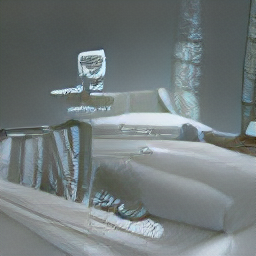

In [71]:
# display an image
images[0]

## Rank images with CLIP

We use `openai/clip-vit-base-patch32` to rank generated images against the prompt.

In [72]:
from transformers import CLIPProcessor, FlaxCLIPModel

In [73]:
# set up model and processor
clip = FlaxCLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


The CLIP processor tokenizes text and pre-processes images (resize to 224x224 and normalize) as required per the CLIP model.

In [74]:
# evaluate scores
inputs = processor(text=prompt, images=images, return_tensors='np')
logits = clip(**inputs).logits_per_image
scores = jax.nn.softmax(logits, axis=0).squeeze()  # normalize and sum all scores to 1

Prompt: tttfdds daaa ffggff safyvss csdjsxihdisslsdj skhkxzhakldkm skhsl dg df  ambjh

Score: 0.47682714462280273


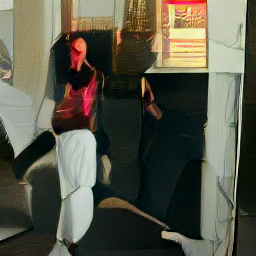


Score: 0.2838664650917053


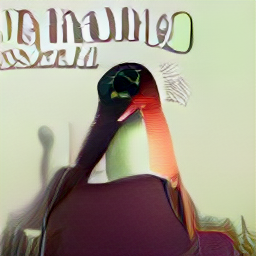


Score: 0.1230359748005867


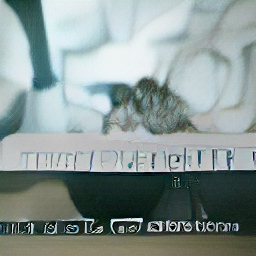


Score: 0.07476586103439331


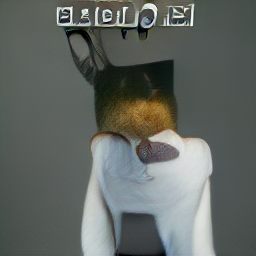


Score: 0.020317720249295235


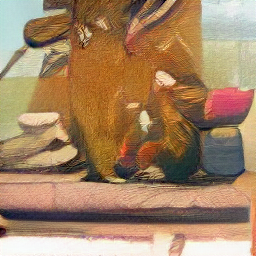


Score: 0.017025314271450043


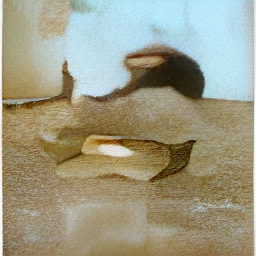


Score: 0.0036818133667111397


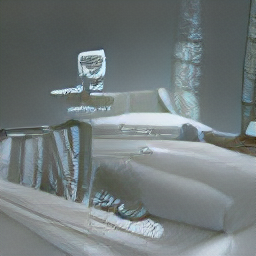


Score: 0.00047977030044421554


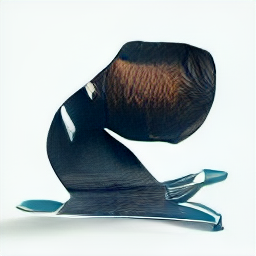

In [75]:
# rank images by score
print(f'Prompt: {prompt}\n')
for idx in scores.argsort()[::-1]:
    print(f'Score: {scores[idx]}')
    display(images[idx])
    print()

## Leverage JAX for faster inference

[JAX](https://github.com/google/jax) uses XLA to compile code to GPU/TPU, leading to faster inference.

Even with only 1 GPU, we can benefit from impressive speedups, even more after first inference (where the compilation happens).

In [2]:
from functools import partial
from flax.training.common_utils import shard
from flax.jax_utils import replicate

ModuleNotFoundError: ignored

In [ ]:
# check we can access TPU's or GPU's
jax.devices()

In [ ]:
# replicate parameters on all devices
dalle_params = replicate(model.params)
vqgan_params = replicate(vqgan.params)

In [ ]:
# one set of inputs per device
prompt = ['picture of a waterfall under the sunset'] * jax.device_count()

In [ ]:
# tokenize prompts and shard them across available devices
tokenized_prompt = tokenizer(prompt, return_tensors='jax', padding='max_length', truncation=True, max_length=128).data
tokenized_prompt = shard(tokenized_prompt)

We use `pmap` to compile the functions with XLA and perform operations in parallel on multiple devices.

In [ ]:
# parallelize and compile functions

# function to generate encoded images
@partial(jax.pmap, axis_name="batch")
def p_generate(tokenized_prompt, key, params):
    return model.generate(
        **tokenized_prompt,
        do_sample=True,
        num_beams=1,
        prng_key=key,
        params=params
    )

# function to decode images
@partial(jax.pmap, axis_name="batch")
def p_decode(indices, params):
    return vqgan.decode_code(indices, params=params)

In [ ]:
# generate images with compiled functions
n_predictions = 8
images = []

for i in trange(n_predictions // jax.device_count()):
    key, *subkeys = jax.random.split(key, jax.device_count() + 1)
    subkeys = jax.numpy.stack(subkeys)

    encoded_images = p_generate(tokenized_prompt, subkeys, dalle_params)
    encoded_images = encoded_images.sequences[..., 1:]

    decoded_images = p_decode(encoded_images, vqgan_params)
    decoded_images = decoded_images.clip(0., 1.).reshape((-1, 256, 256, 3))

    for img in decoded_images:
        images.append(Image.fromarray(np.asarray(img * 255, dtype=np.uint8)))

In [ ]:
for img in images:
    display(img)
    print()